# 1. Importing Libraries 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.tree import export_text
from sklearn import tree

# 2. Loading Dataset 

In [8]:
df = pd.read_csv('dataset/cirrhosis.csv')

In [9]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [14]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [15]:
df.isnull().sum().sum()

1033

# 3. EDA 

## i)Histogram of 'Age' column 

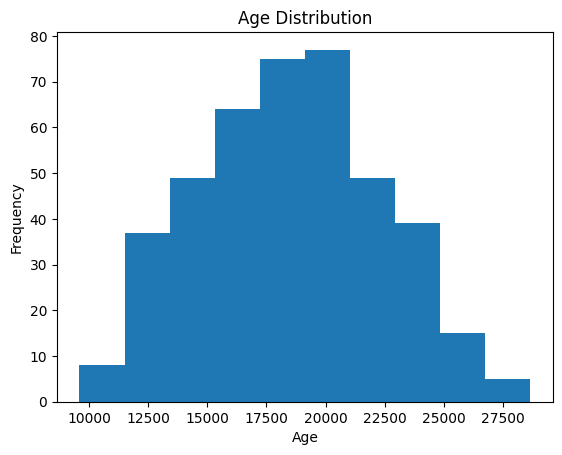

In [16]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## ii)Box plot for numeric variables 

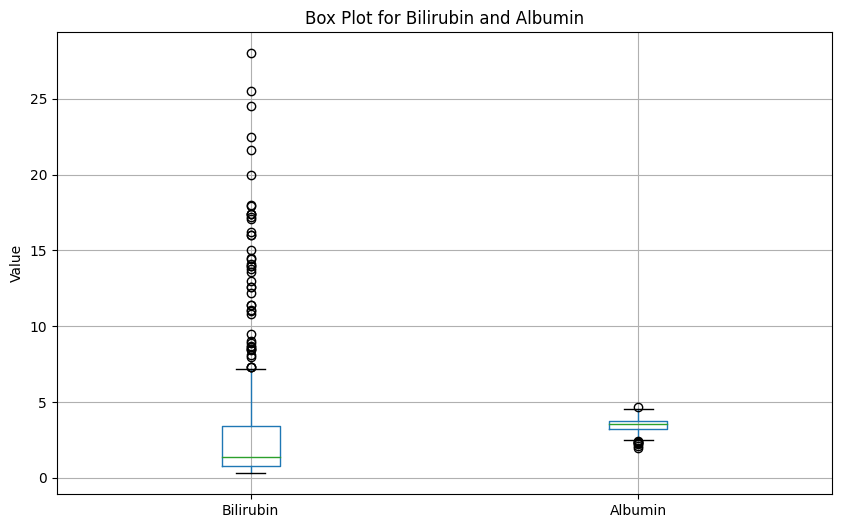

In [17]:
plt.figure(figsize=(10, 6))
df[['Bilirubin', 'Albumin']].boxplot()
plt.title('Box Plot for Bilirubin and Albumin')
plt.ylabel('Value')
plt.show()

## iii) Count Plot for Categorical Variables

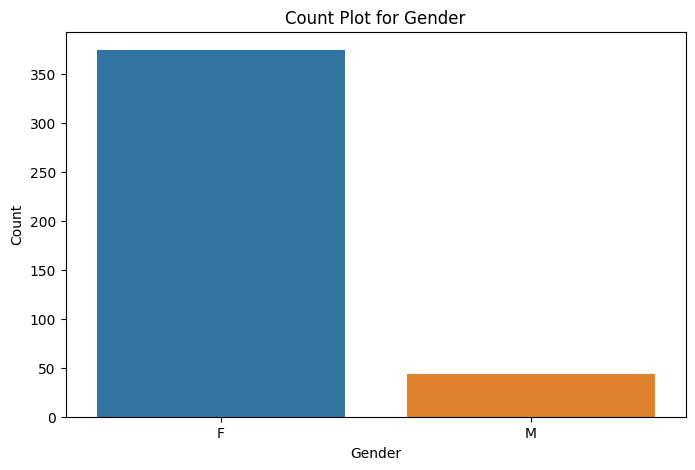

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex')
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## iv) Pairplot for Numerical Variables

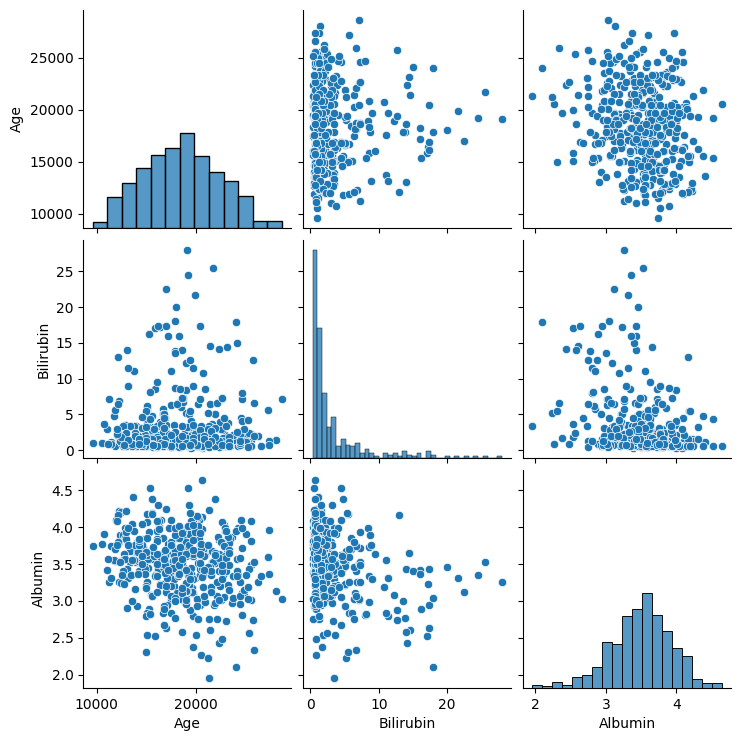

In [19]:
sns.pairplot(df[['Age', 'Bilirubin', 'Albumin']])
plt.show()

# 4. Feature Selection 

In [23]:
X = df[['Age', 'Bilirubin', 'Albumin']]
y = df['Status']

# 5. Splitting Data 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training 

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# 7. Testing Model 

In [27]:
y_pred = clf.predict(X_test)

# 8. Model Evaluation 

## i) Performance Metrics - Accuracy, Confusion Matrix, Classification Report 

In [29]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.6190476190476191

Confusion Matrix:
 [[29  0 15]
 [ 1  0  3]
 [11  2 23]]

Classification Report:
               precision    recall  f1-score   support

           C       0.71      0.66      0.68        44
          CL       0.00      0.00      0.00         4
           D       0.56      0.64      0.60        36

    accuracy                           0.62        84
   macro avg       0.42      0.43      0.43        84
weighted avg       0.61      0.62      0.61        84



## ii) Confusion Matrix Heatmap 

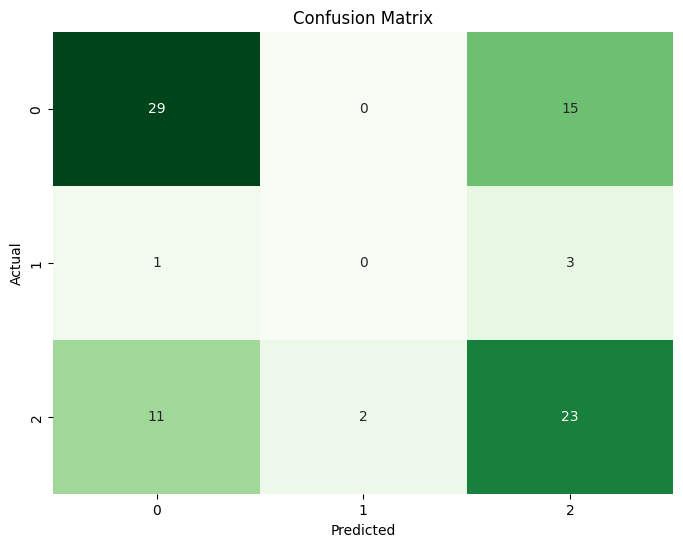

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()b